In [33]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df=pd.read_csv("train__dataset.csv")

In [35]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18132,1,0,0,2,0,0,0,103,2018,4,19,0,0,0,0,115.00,0,1
18133,2,0,0,3,0,0,0,129,2018,8,10,1,0,0,0,88.01,1,0
18134,2,0,0,1,0,0,0,90,2018,7,13,1,0,0,0,105.30,0,1
18135,2,0,0,3,0,0,0,18,2018,11,10,1,1,0,1,123.33,1,0


In [36]:
""" from pandas_profiling import ProfileReport
ProfileReport(df) """

' from pandas_profiling import ProfileReport\nProfileReport(df) '

In [37]:
df.shape

(18137, 18)

In [38]:
df=df.drop_duplicates()

In [39]:
df.shape

(14026, 18)

In [40]:
Ncanceled =df['booking_status'].sum()
total=df.shape[0]
Ncanceled/total

0.29210038499928703

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14026 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          14026 non-null  int64  
 1   no_of_children                        14026 non-null  int64  
 2   no_of_weekend_nights                  14026 non-null  int64  
 3   no_of_week_nights                     14026 non-null  int64  
 4   type_of_meal_plan                     14026 non-null  int64  
 5   required_car_parking_space            14026 non-null  int64  
 6   room_type_reserved                    14026 non-null  int64  
 7   lead_time                             14026 non-null  int64  
 8   arrival_year                          14026 non-null  int64  
 9   arrival_month                         14026 non-null  int64  
 10  arrival_date                          14026 non-null  int64  
 11  market_segment_

 don't have null values

In [42]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [43]:
df['type_of_meal_plan'].unique() #need one hot code

array([0, 1, 2, 3], dtype=int64)

In [44]:
one_hot = pd.get_dummies(df['type_of_meal_plan'], prefix='type_of_meal_plan')

# Add the one-hot encoded variables to the original dataframe
df = pd.concat([df, one_hot], axis=1)
df=df.drop(columns=['type_of_meal_plan'])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_0,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3
0,2,0,1,4,0,0,118,2017,12,28,...,0,0,0,110.80,2,0,1,0,0,0
1,2,1,0,2,0,0,17,2018,4,14,...,0,0,0,145.00,0,1,1,0,0,0
2,1,0,1,5,0,0,349,2018,10,4,...,0,0,0,96.67,0,1,1,0,0,0
3,1,0,2,4,0,0,69,2018,6,12,...,0,0,0,120.00,0,1,1,0,0,0
4,2,0,0,4,0,0,11,2018,1,20,...,0,0,0,69.50,1,0,0,1,0,0


In [45]:
df['room_type_reserved'].unique() #need one hot code

array([0, 1, 4, 3, 2, 5, 6], dtype=int64)

In [46]:
one_hot = pd.get_dummies(df['room_type_reserved'], prefix='room_type_reserved')

# Add the one-hot encoded variables to the original dataframe
df = pd.concat([df, one_hot], axis=1)
df=df.drop(columns=['room_type_reserved'])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,...,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3,room_type_reserved_0,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6
0,2,0,1,4,0,118,2017,12,28,1,...,0,0,0,1,0,0,0,0,0,0
1,2,1,0,2,0,17,2018,4,14,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,5,0,349,2018,10,4,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,2,4,0,69,2018,6,12,0,...,0,0,0,1,0,0,0,0,0,0
4,2,0,0,4,0,11,2018,1,20,1,...,1,0,0,1,0,0,0,0,0,0


In [47]:
df['market_segment_type'].unique() #need one hot code

array([1, 0, 2, 4, 3], dtype=int64)

In [48]:
one_hot = pd.get_dummies(df['market_segment_type'], prefix='market_segment_type')

# Add the one-hot encoded variables to the original dataframe
df = pd.concat([df, one_hot], axis=1)
df=df.drop(columns=['market_segment_type'])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,market_segment_type_0,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4
0,2,0,1,4,0,118,2017,12,28,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,0,2,0,17,2018,4,14,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,5,0,349,2018,10,4,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,2,4,0,69,2018,6,12,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,0,4,0,11,2018,1,20,0,...,0,0,0,0,0,0,1,0,0,0


If the 'arrival_year', 'arrival_month', and 'arrival_date' columns are currently of integer type, it may be beneficial to change their data type to category type. This will prevent these columns from affecting the accuracy of the model and will allow for easier manipulation and analysis of the data.

In [49]:
df['arrival_year'] = df['arrival_year'].astype('category')
df['arrival_month'] = df['arrival_month'].astype('category')
df['arrival_date'] = df['arrival_date'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14026 entries, 0 to 18136
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          14026 non-null  int64   
 1   no_of_children                        14026 non-null  int64   
 2   no_of_weekend_nights                  14026 non-null  int64   
 3   no_of_week_nights                     14026 non-null  int64   
 4   required_car_parking_space            14026 non-null  int64   
 5   lead_time                             14026 non-null  int64   
 6   arrival_year                          14026 non-null  category
 7   arrival_month                         14026 non-null  category
 8   arrival_date                          14026 non-null  category
 9   repeated_guest                        14026 non-null  int64   
 10  no_of_previous_cancellations          14026 non-null  int64   
 11  no

Is there outliers

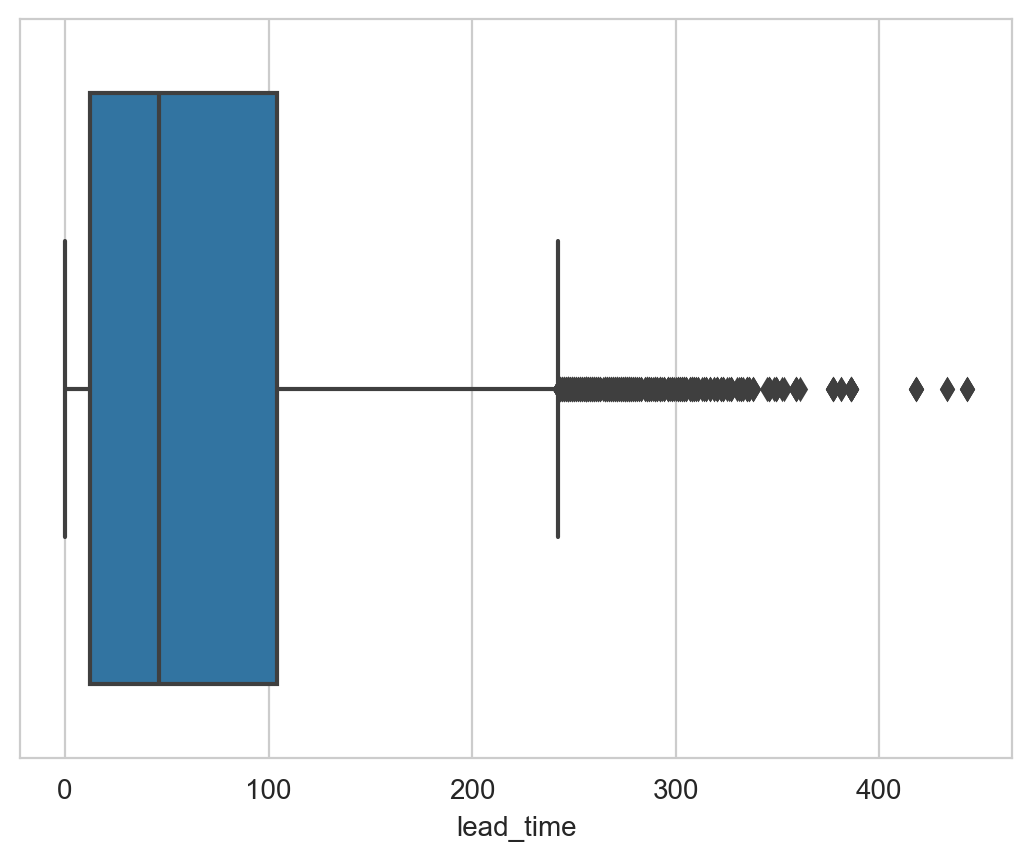

In [50]:
sns.boxplot(x=df["lead_time"])
plt.show()

In [51]:
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Count the number of outliers
num_outliers = ((df['lead_time'] < lower_bound) | (df['lead_time'] > upper_bound)).sum()

# Print the result
print(f"Number of outliers in 'column': {num_outliers}")

Number of outliers in 'column': 460


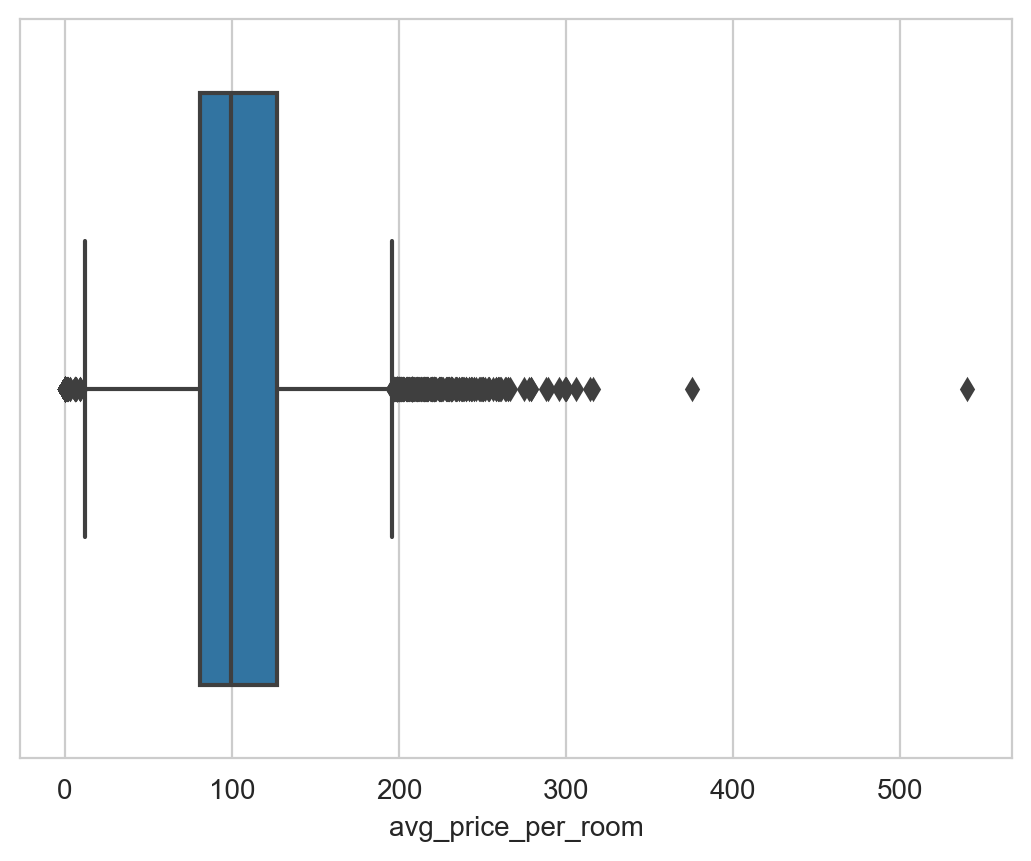

In [52]:
sns.boxplot(x=df["avg_price_per_room"])
plt.show()

In [53]:
Q1 = df['avg_price_per_room'].quantile(0.25)
Q3 = df['avg_price_per_room'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Count the number of outliers
num_outliers = ((df['avg_price_per_room'] < lower_bound) | (df['avg_price_per_room'] > upper_bound)).sum()

# Print the result
print(f"Number of outliers in 'column': {num_outliers}")

Number of outliers in 'column': 573


In [54]:
#####
#     to test without outliers

We can identify outliers in our data by observing the boxplot. However, if there are outliers present, it may not be necessary to remove them. In fact, removing outliers could potentially decrease the accuracy of the model.

In [55]:
df['has_children'] = df['no_of_children'].apply(lambda x: 0 if x == 0 else 1)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,market_segment_type_0,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4,has_children
0,2,0,1,4,0,118,2017,12,28,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,0,2,0,17,2018,4,14,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,1,5,0,349,2018,10,4,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,2,4,0,69,2018,6,12,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,4,0,11,2018,1,20,0,...,0,0,0,0,0,1,0,0,0,0


In [56]:
df['co1'] = df['arrival_month'].apply(lambda x: 1 if x <=3  else 0)
df['co2'] = df['arrival_month'].apply(lambda x: 1 if  (x >3 and x <=6)  else 0)
df['co3'] = df['arrival_month'].apply(lambda x: 1 if (x >6 and x <=9) else 0)
df['co4'] = df['arrival_month'].apply(lambda x: 1 if (x >9 and x <=12) else 0)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,market_segment_type_0,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4,has_children,co1,co2,co3,co4
0,2,0,1,4,0,118,2017,12,28,0,...,0,1,0,0,0,0,0,0,0,1
1,2,1,0,2,0,17,2018,4,14,0,...,0,1,0,0,0,1,0,1,0,0
2,1,0,1,5,0,349,2018,10,4,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,2,4,0,69,2018,6,12,0,...,1,0,0,0,0,0,0,1,0,0
4,2,0,0,4,0,11,2018,1,20,0,...,0,1,0,0,0,0,1,0,0,0


In [57]:
df.to_csv('editing.csv',index=False)

### Building models

In [58]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve,confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from scipy import stats
import pickle
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
%pylab inline
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [59]:
X = df.drop(columns = ['booking_status'])
y = df['booking_status']

In [60]:
X_train, X_val, y_train,y_val = train_test_split(X,y,test_size =.04,random_state=42)
X_train, X_test, y_train,y_test = train_test_split(X_train,y_train,test_size =.04,random_state=42)

In [61]:
def get_scores(model):
    model.fit(X_train,y_train)
    print(f'Traing score: {model.score(X_train,y_train)}')
    print(f'Val score:    {model.score(X_val,y_val)}')
    print( f"F1 score:    {f1_score(model.predict(X_val),y_val)}")
    print(f'Precision score: {precision_score(y_val,model.predict(X_val))}')
    print(f'Recall score: {recall_score(y_val,model.predict(X_val))}')
    print(f'accuracy score: {accuracy_score(y_val, model.predict(X_val))}')

### Logistic Regression

In [62]:
LR = LogisticRegression(solver='liblinear')
get_scores(LR)

Traing score: 0.8048742746615087
Val score:    0.791814946619217
F1 score:    0.6138613861386139
Precision score: 0.6992481203007519
Recall score: 0.5470588235294118
accuracy score: 0.791814946619217


###  Standard Scaler

In [63]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_val_scaled = scale.fit_transform(X_val)
SLR = LogisticRegression(solver='liblinear')
SLR.fit(X_train_scaled, y_train)
y_predict = SLR.predict(X_train_scaled) 
print(f"Training: {SLR.score(X_train_scaled,y_train)}") 
print(f"val:      {SLR.score(X_val_scaled,y_val)}") 
print( f"F1 score: {f1_score(SLR.predict(X_val_scaled),y_val)}")
print(f'Precision score: {precision_score(y_val,SLR.predict(X_val_scaled))}')
print(f'Recall score: {recall_score(y_val,SLR.predict(X_val_scaled))}')
print(f'accuracy score: {accuracy_score(y_val, SLR.predict(X_val_scaled))}')

Training: 0.8079690522243713
val:      0.791814946619217
F1 score: 0.6086956521739131
Precision score: 0.7054263565891473
Recall score: 0.5352941176470588
accuracy score: 0.791814946619217


### knn

In [64]:
kNNC = KNeighborsClassifier(n_neighbors=10)
get_scores(kNNC)

Traing score: 0.7942746615087041
Val score:    0.7508896797153025
F1 score:    0.4488188976377953
Precision score: 0.6785714285714286
Recall score: 0.3352941176470588
accuracy score: 0.7508896797153025


### Decision Tree

In [65]:
DTC = DecisionTreeClassifier()
get_scores(DTC)

Traing score: 0.9962862669245648
Val score:    0.7935943060498221
F1 score:    0.6484848484848484
Precision score: 0.66875
Recall score: 0.6294117647058823
accuracy score: 0.7935943060498221


### Random Forest

In [66]:
RFC = RandomForestClassifier(n_estimators=10, random_state=1)
get_scores(RFC)

Traing score: 0.9842166344294004
Val score:    0.8149466192170819
F1 score:    0.6601307189542484
Precision score: 0.7426470588235294
Recall score: 0.5941176470588235
accuracy score: 0.8149466192170819


the best model is Random Forest

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [68]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [71]:
CV_RFC = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 5)
CV_RFC.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
CV_RFC.best_params_

In [72]:
RFC1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [73]:
RFC1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [74]:
pred=RFC1.predict(X_test)

In [75]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8460111317254174


# ----------------NN---------------------

In [76]:
import keras
keras.__version__

'2.12.0'

In [77]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [78]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [81]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [84]:
history = model.fit(partial_X_train,partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
6/6 [==============================] - 0s 46ms/step - loss: 17.2191 - binary_accuracy: 0.6161 - val_loss: 8.2970 - val_binary_accuracy: 0.7281
Epoch 2/20
6/6 [==============================] - 0s 36ms/step - loss: 13.4481 - binary_accuracy: 0.6588 - val_loss: 11.3423 - val_binary_accuracy: 0.3129
Epoch 3/20
6/6 [==============================] - 0s 43ms/step - loss: 14.1840 - binary_accuracy: 0.6356 - val_loss: 3.9266 - val_binary_accuracy: 0.7452
Epoch 4/20
6/6 [==============================] - 0s 44ms/step - loss: 13.7201 - binary_accuracy: 0.6386 - val_loss: 3.5140 - val_binary_accuracy: 0.7295
Epoch 5/20
6/6 [==============================] - 0s 44ms/step - loss: 7.8954 - binary_accuracy: 0.6865 - val_loss: 4.2772 - val_binary_accuracy: 0.7592
Epoch 6/20
6/6 [==============================] - 0s 44ms/step - loss: 13.7902 - binary_accuracy: 0.6496 - val_loss: 8.4115 - val_binary_accuracy: 0.3190
Epoch 7/20
6/6 [==============================] - 0s 40ms/step - loss: 12.89

In [85]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

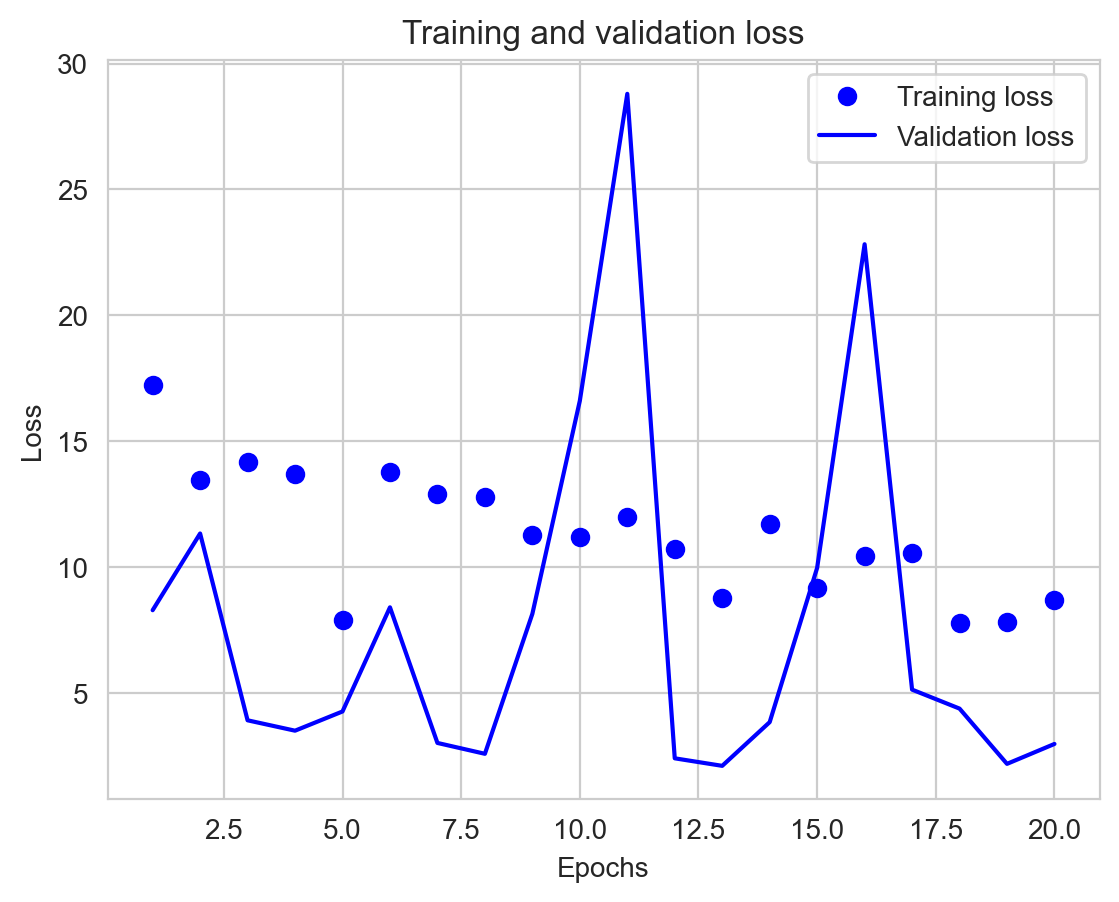

In [86]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

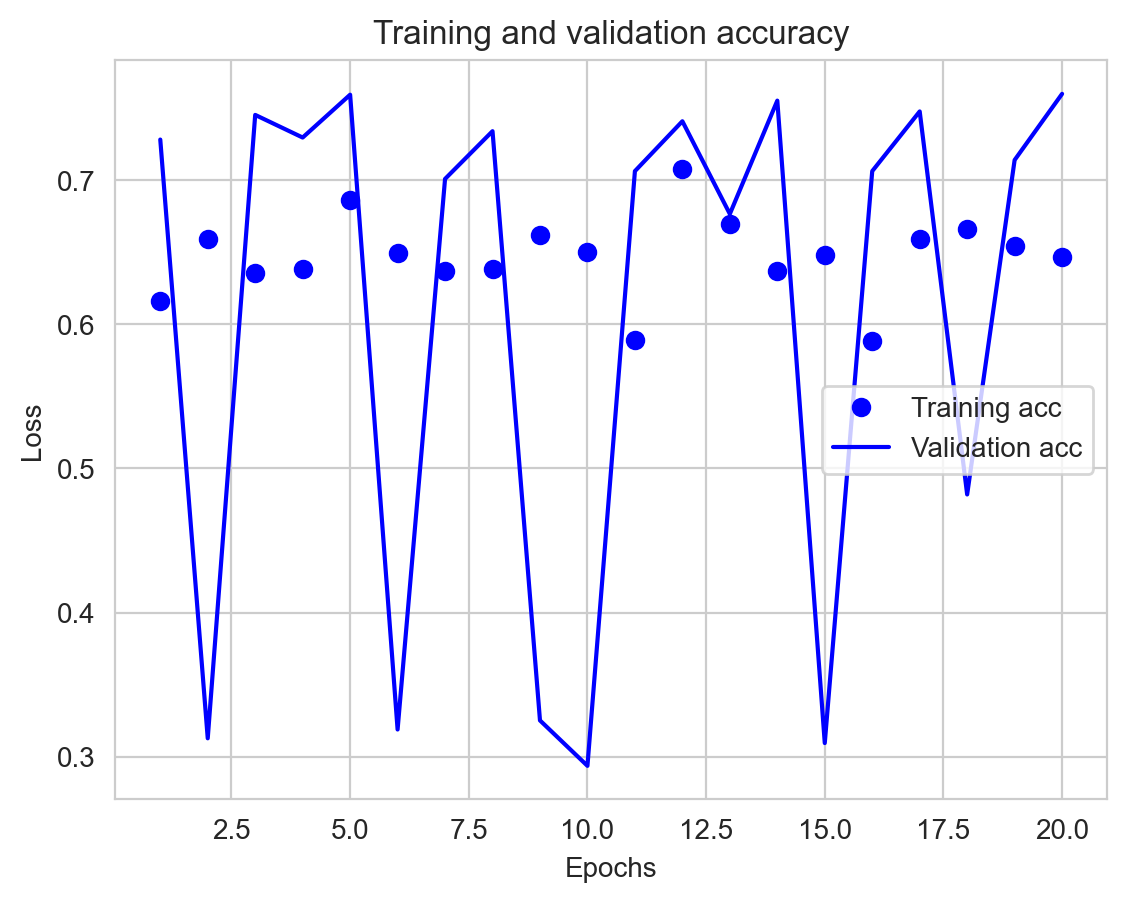

In [87]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [88]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
26/26 [==============================] - 1s 3ms/step - loss: 51.2386 - accuracy: 0.6791
Epoch 2/4
26/26 [==============================] - 0s 3ms/step - loss: 8.7505 - accuracy: 0.5225
Epoch 3/4
26/26 [==============================] - 0s 3ms/step - loss: 6.9056 - accuracy: 0.5323
Epoch 4/4
17/17 [==============================] - 0s 2ms/step - loss: 3.8753 - accuracy: 0.5083


In [89]:
results

[3.8752875328063965, 0.508348822593689]